# Day 2: A python class example
Date: 01/05/2022
Author: Lucy Hackett

Goal: Introduce OLS as a minimum-distance estimator. We will:
- write a very simple class example, explaining instantiation, methods, and scope
- give a brief explanation of the scipy.optimize.minimize function
- show how to pull from random distributions
- create and plot x, y data
- make a linear projection function with b0, b1, x as input, y as output
- minimize the squared errors to estimate b0 and b1
- create a class that implements the same minimization, 
  that takes data in instantiation, and has an 'estimate' method.

In [1]:
# for later
import numpy as np
from scipy.stats import distributions as iid
from scipy.stats import rv_continuous

## Introduction to python classes
python classes are objects that have attributes and methods. These objects are abstract in the sense that a class in the abstract is used to "instantiate" specific "instances" of the class. For example, here we will create a class called Student, and will create several instantiations of specific students.

To define a class, we use ``class ClassName:``, followed by indented lines (convention is to name classes with upper case).

Classes have 3 components:
* **The constructor** this is a method (think: function) that creates an _instance_ of the class. This component must be present in all classes, as it is the engine that creates the object. It looks like ``def __init__(self):``
* **Attributes** These are attributes that all instances of a class have. They can be anything, or not exist at all. For example, in a Student class, we might want student's to have attributes like a student ID, gender, age, etc. These can vary by instance of the Student class, but all instances of ``Student`` have one. If we imagine an alternative class called `Alien()`, attributes might include home planet and and number of limbs.
* **Methods** Methods are functions that belong to a class. They may return output or not. For example, we may want to write a method that calculates the student's GPA given a series of numeric grades.

The most simple class is made up of only a constructor, and the most simple constructor doesn't do anything except create an instance of the class. This looks like:

In [2]:
class Student:
    def __init__(self):
        # print something just to show the instance is created
        # we don't even need this; we could also just type:
        # pass
        print("I made a student!") 

In [3]:
# notice how the constructor method is executed when I call Student(),
# as evidenced by the fact that the print() inside the __init__ method runs
luisa = Student()

I made a student!


In [4]:
# Luisa is a Student
luisa

Now let's (re)make this class more interesting by adding attributes. Attributes can be passed into the instance of the object by defining the constructor as a function of the arguments we want to pass in. Let's pass in the following attributes:
* name (a ``string``)
* grades (a ``numpy array`` of numbers)
* age

We do this by defining these attributes with ``self.attribute =`` in the constructor function:

In [5]:
class Student:
    def __init__(self, name, grades, age):
        self.name = name
        self.grades = grades
        self.age = age

In [6]:
# create an instance of the class:
luisa = Student("Luisa", np.array([4.0, 3.5, 3.0]), 28)
armond = Student("Armand", np.array([3.0, 3.5, 3.0]), 23)
# we can access thse attributes using the .:
print(luisa.grades)
print(armond.grades)

[4.  3.5 3. ]
[3.  3.5 3. ]


Attributes can also be added as functions of input data, or set within methods. Let's add an indicator for the student being over 25 (for some reason we're interested in this):

In [7]:
class Student:
    def __init__(self, name, grades, age):
        self.name = name
        self.grades = grades
        self.age = age
        self.over25 = (age > 25)

In [8]:
# create an instance of the class:
luisa = Student("Luisa", np.array([4.0, 3.5, 3.0]), 28)
armond = Student("Armand", np.array([3.0, 3.5, 3.0]), 23)
# we can access thse attributes using the .:
print(luisa.over25)
print(armond.over25)

True
False


Finally, we add in methods. Methods (usually) go _outside the constructor environment_ (unindented), as they are not created when the instance is created but rather called later. Because these "belong" to the class just like attributes do, we call these methods using ``instanceName.methodName()`` similar to how attributes are also accessed using ``.``. Let's write two simple methods:
* A method that takes as an input a greeting phrase and prints ``_____, [instance name]!``.
* A method that returns the student's GPA

Note a couple things about the method below:
* class methods are defined with ``self`` as the first argument, but this argument is omitted when the method is called.
* Because ``self`` is passed to the methods, these have access to any methods and attributes that belong to the class.

In [9]:
class Student:
    def __init__(self, name, grades, age):
        self.name = name
        self.grades = grades
        self.age = age
        
    def greeting(self, phrase):
        print(phrase+', '+self.name+'!')
        
    def gpa(self):
        return(np.mean(self.grades))

In [10]:
luisa = Student("Luisa", np.array([4.0, 3.5, 3.0]), 28)

In [11]:
# call the greeting method
luisa.greeting("Ahoy")

Ahoy, Luisa!


In [12]:
# calculate Luisa's GPA:
gpa = luisa.gpa()
print(gpa)

3.5


Note that methods can also be called internally within the class, and can even be used to set attributes. Suppose we want to update a student's grades by adding a new set of grades to their list. We can write a method that does this as so:

In [13]:
class Student:
    def __init__(self, name, grades, age):
        self.name = name
        self.grades = grades
        self.age = age
        
    def greeting(self, phrase):
        print(phrase+', '+self.name+'!')
        
    def gpa(self):
        return(np.mean(self.grades))
    
    def updateGrades(self, grade):
        # append a new grade to self.grades
        self.grades = np.append(self.grades, grade)

In [14]:
jair = Student("Jair", np.array([3.0, 3.0, 3.0]), 35)
print(jair.grades)

jair.updateGrades(np.array([4.0, 4.0]))
print(jair.grades)

[3. 3. 3.]
[3. 3. 3. 4. 4.]


## Python classes in the wild: Random numbers

Now that we have seen the basic functionality of python classes, you will notice that classes are **everywhere**. python is a multi-paradigm language, meaning it can be used to program functionally and/or used with OOP (objet-oriented programming, or basically based around classes). Many, many python packages are build around classes. 

A nearby example are random variable distributions from the ``scipy.stats`` module. These distributions are actually themselves instances of subclasses created from a class called ``rv_continuous`` (does your head hurt yet? Don't worry about what a subclass is yet- this comes from _inheritance_, which we are also not going to get into here). Let's take a look at one of these sub classes, ``scipy.stats.norm()`` whose documentation lives [here](https://docs.scipy.org/doc/scipy/reference/reference/generated/scipy.stats.norm.html).

In [15]:
# instantiate a normal distribution
# note that passing arguments into the instantiation here is not
# necessary; that is because there are default values for attributes
# such as the mean and variance (sufficient statistics for this dist.)
x = iid.norm()

In [16]:
# access an attribute: random state
# (used to generate random numbers)
x.random_state

RandomState(MT19937) at 0x1201D0940

In [17]:
# access a method: get the mean
x.mean()

0.0

In [18]:
# another method: generate random numbers using the rvs() method, which takes as an
# input the number of draws to make
x.rvs(5)

array([-0.37095558,  0.3979574 ,  0.55674233,  1.23842383,  1.30109562])

In [19]:
# note that we can create more instances with different attributes:
x5 = iid.norm(loc=5)
x5.mean()

5.0

## Exercise
Use ``scipy.stats`` distributions to generate 2 vectors ``v1`` and ``v2``. Try and read the documentation for the gamma distribution [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gamma.html) to make one of these vectors distributed $\Gamma(a), a > 0$. The documentation for the normal distribution if you want to play with that is [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm).

Plot these against eachother.

In [20]:
# Step 1: instantiate

# v1 distributed normal (5,5)
v1 = iid.norm(loc=5,scale=5)
# x dist. gamma(a)
a = 2
v2 = iid.gamma(a)

In [21]:
# Step 2: generate random numbers
N = 100
v1_draw = v1.rvs(N)
v2_draw = v2.rvs(N)

Text(0, 0.5, 'Y')

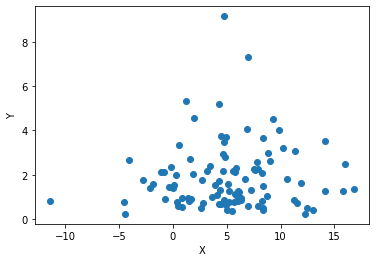

In [22]:
# extra: plot
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(v1_draw, v2_draw)

ax.set_xlabel("X")
ax.set_ylabel("Y")

## Building blocks of an OLS class
Now, before defining the OLS class methods, we are going to write its methods first outside the class so that we know they are behaving properly. Our goal is to write 2 main methods:
1. Linear projection
    - inputs: b0, b1, x
    - outputs: y
2. Minimizer function: minimizes the squared distance between the linear projection and y

### 1. Linear projection
Suppose we have a vector X that is N by 2, where the first column is a column of ones, and a vector of betas: b = [b0, b1]. The projection matrix, or the matrix that predicts y, is given by $Xb$.

In [23]:
def linear_projection(X, b):
    return X@b

In [24]:
# Now let's create some data with a function that takes a true
# value for beta, and a desired number of observ. and creates X and y
def dataGenerator(beta, N):
    # create an X vector
    # note I instantiate iid.norm() and call method rvs() in the same step!
    x = iid.norm().rvs(N)

    # create a random error
    e = iid.norm().rvs(N)
    # add an intercept by vertically stacking x with an array of ones,
    # then transposing
    X = np.vstack((np.ones(N), x)).T
    # create y
    y = linear_projection(X, beta) + e
    
    return X, y

In [25]:
# create data
beta_true = [2,8]
N = 100

X, y = dataGenerator(beta_true, N)

### 2. Minimizer function
In order to minimize, we are going to use a minimizer function from ``scipy.optimize``. The documentation for this function can be found [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html), but the key arguments are the following:
* ``fun``: the function to be minimized. This must be a function of only one input; if there are multiple inputs, we will "mask" these using lambda functions.
* ``x0``: The start guess for the solution. In the case that the solution has a global minimum (as the least squares problem does) the choice will only affect computation time.

Thus the final syntax is `minimize(fun = function(x), x0 = [start guess])`.

The function returns an instance of the ``OptimizeResult`` class, which has several attributes. The only one we will be interested in for now is ``x``, the solution that solves the minimization.

Let's set up a function that returns the object we want to minimize: the sum of squared errors:

In [26]:
def sse(y, X, b):
    yhat = linear_projection(X, b)
    sse = np.sum((yhat - y)**2)
    return sse

In [27]:
sse(y,X,beta_true)

108.80607054431852

Now we can minimize this function, making it a function of just one variable by masking the other inputs in a lambda function:

In [28]:
from scipy.optimize import minimize

In [29]:
# remember the syntax: 
# minimize(fun = function(x), x0 = [start guess])
# the lambda function allows sse to be a function of only x, the other inputs
# come from the variables X and y we already defined.
minimize(lambda x: sse(y, X, x), x0 = [0,0])
# as expected, we get an intercept of around 2 and a slope around 8

      fun: 107.45898420092033
 hess_inv: array([[0.00504554, 0.00048831],
       [0.00048831, 0.00523639]])
      jac: array([1.90734863e-06, 3.81469727e-06])
  message: 'Optimization terminated successfully.'
     nfev: 30
      nit: 7
     njev: 10
   status: 0
  success: True
        x: array([1.92832132, 7.89980861])

In [30]:
# let's do it again with a higher N, letting the LLN work for us!
X, y = dataGenerator(beta_true, 100000)
minimize(lambda x: sse(y, X, x), x0 = [0,0])
# now it's even more accurate!

      fun: 99420.31521912437
 hess_inv: array([[ 5.55946807e-06, -2.95258327e-06],
       [-2.95258327e-06,  2.22913861e-06]])
      jac: array([-0.00097656,  0.        ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 51
      nit: 8
     njev: 17
   status: 2
  success: False
        x: array([2.00741798, 8.00130185])

## Creating an OLS class
Now let's take our functions and organize them into an OLS class. This class will have attributes X and y, and methods defined by the functions above.

In [31]:
class OLS:
    # constructor
    def __init__(self, X, y):
        # define attributes
        self.X = X
        self.y = y
    
    ##### methods
    # linear projection
    def linear_projection(self, b):
        return self.X@b
    # SSE
    def sse(self, b):
        yhat = linear_projection(self.X, b)
        sse = np.sum((yhat - self.y)**2)
        return sse
    # minimize the SSE
    def estimate(self, x0 = [0,0]):
        # default initial guess of [0,0]
        sol = minimize(self.sse, x0 = x0)
        return sol.x

What happened to the arguments in minimize?? Here something cool happens, and it actually starts with the `sse` function. Now that `X` and `y` are attributes of the class, the `self.see()` method knows what they are thanks to the `self` argument that is implicitly passed into it! Therefore we can call `sse()` as only a function of one argument: `b`. Here's proof:

In [32]:
# instantiate model
model1 = OLS(X, y)

# call sse method
model1.sse([2,1])

5026120.230597598

Now that `OLS.sse()` is only a function of one argument, we can omit the arguments altogether in the minimze function, and call it just by its name, `self.sse`. It already knows that the single argument is what it is minimizing over! Let's test it:

In [33]:
# call the solve_OLS() method
model1.estimate()

array([2.00741798, 8.00130185])